In [29]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from river import drift

Change detected at index 5215, input value: 4


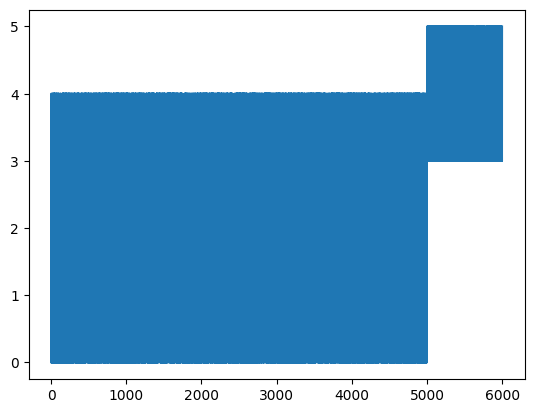

In [34]:
rng = random.Random(12345)
adwin = drift.ADWIN()

data_stream = rng.choices([0, 1, 3, 4], k=5000) + rng.choices(range(3, 6), k=1000)

plt.plot(data_stream)

for i, val in enumerate(data_stream):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")

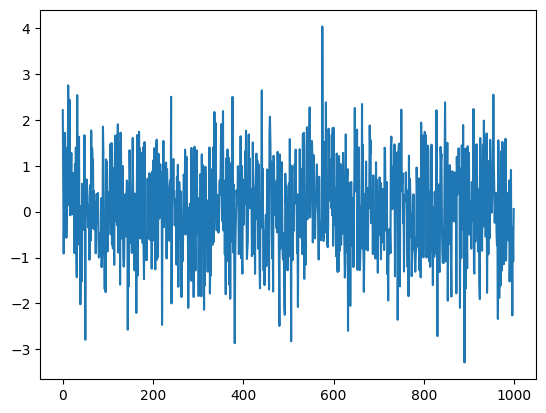

In [35]:
data = [rng.gauss(0, 1) for _ in range(1000)]
plt.plot(data)

In [39]:
rtrigger = drift.DummyDriftDetector(
    trigger_method="random",
    t_0=500,
    w=100,
    dynamic_cloning=True,
    seed=42
)
for i, v in enumerate(data):
    rtrigger.update(v)
    if rtrigger.drift_detected:
        print(f"Drift detected at instance {i}.")

Drift detected at instance 368.
Drift detected at instance 817.
